# Animations  

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython.display as display

In [3]:
display.HTML('<div><img src=\"https://git-scm.com/images/icons/nav-about@2x.png\" width=\"74\" height=\"74\" /></div>')

In [4]:
display.Video('https://archive.org/download/Sita_Sings_the_Blues/Sita_Sings_the_Blues_small.mp4')

## Decay

This example showcases:

- using a generator to drive an animation,
- changing axes limits during an animation.

Output generated via `matplotlib.animation.Animation.to_jshtml`.

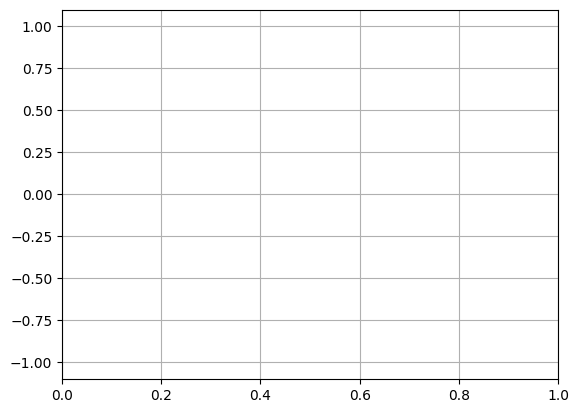

In [8]:
import itertools

def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 1)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init,
                              save_count=100)

In [12]:
display.HTML(jshtml)

## Dynamic Image

Animated image using a precomputed list of images

Output generated via `matplotlib.animation.Animation.to_jshtml`

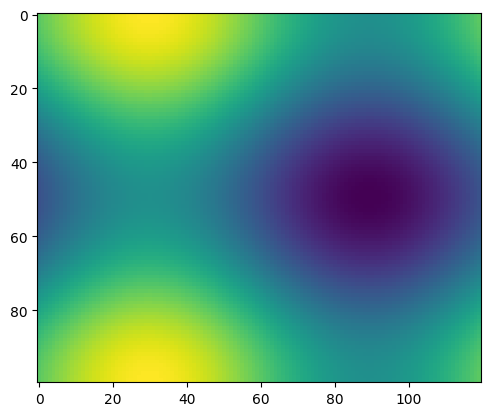

In [13]:
fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15
    y += np.pi / 30
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

dynamic_img = ani.to_jshtml()

In [14]:
display.HTML(dynamic_img)

## Traveling Wave  

Here we will plot and animate a traveling wave of the form:  

$$ f(x,t\vert A ,\omega_x,\omega_t)  = A\sin(\omega_x x + \omega_t t)$$

where  

$$ \omega_x = 2\pi f_x \quad\quad\text{and}\quad\quad \omega_t = 2\pi f_t $$

The reciprocal of $f_t$ is the time it takes for the wave to travel $2\pi$.  Now, let:  

$$ f(x,t) := f(x,t\vert 1,1,\pi) = \sin(x + \pi t)$$

In the above implementation, the period -- i.e., the time it takes for the wave to travel $2\pi$ -- is $2$ seconds.

It is important to note that, with any plot, model, animation, etc., there are the usual data coordinates and corresponding display coordinates.  Typically, the domain of the display is spatial, but, in the case of an animation, a temporal (time) dimension is added thereto.  

In the case of our traveling wave, the data domain -- i.e., the domain of our wave -- is spatio-temporal, that is, there is one spatial dimension and one temporal dimension.  The codomain has one spatial dimension.  Ultimately, $f(x,t)$, relates a point in spacetime to the altitude of the wave at that point.  This provides a great opportunity to relate the data $t$-coordinates to the corresponding frame of the animation that contains the plot of the wave at that point in time.  In the following animation, we will try to acheive a one to one ration between data and display $t$-coordinates.

Let $I$ be the `interval` parameter of the `ani.to_jshtml` method, which is equal to the default number of milliseconds per frame.  In order to acheive a one to one ration between the data and display time-coordinates, henceforth '$t$' and '$t^*$' respectively, the epsilon $\mathrm{d}t$ of the temporal-dimension $T$ of the domain $D$ of our wave must be equal to $I$.

$$ I = 1000\frac{\mathrm{ms}}{\mathrm{s}} \,\mathrm{d}t \quad\iff\quad t = t^*$$

Note that the actual frames per seconds and playback speed can be altered by other functions.  The above assumes that neither are ever altered.  The epsilon is multiplied by $1000\frac{\mathrm{ms}}{\mathrm{s}}$ in the above equation because the interval is in milliseconds while the epsilon is in seconds.

$$ \mathrm{d}t = \frac{\max T - \min T}{|T|} = \frac{4\mathrm{s}}{50} = \frac{2\mathrm{s}}{25}$$

$$ I = 80\mathrm{ms} $$

In [15]:
1000/25

40.0

In [16]:
def f(x,t):
    return np.sin(x + np.pi*t)

In [ ]:
x = np.linspace(0,2*np.pi,num=200)
total = 50
dt = 4/total

fig, ax = plt.subplots(figsize=(9,3))
ax.set_title('Traveling Wave',size=13)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

ax.plot(x,f(x,0))

curves = []
for i in range(total):
    C = ax.plot(x, f(x,i*dt), animated=True)
    curves.append([C])